In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, random_split

from models.autoencoders import AE, VAE
from trainers.autoencoders import train_ae, train_vae
from utils_.plotting import plot_image_grid
from dataloaders.basic import images_to_np_array_from_im_paths

In [2]:
DATA_PATH = "./datasets/sim_recs"
IMAGE_RESIZE = 256
LATENT_DIM = 16
image_count = 100

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device Name: {torch.cuda.get_device_name(device)}" if device.type == "cuda" else "Using cpu")

Device Name: NVIDIA GeForce RTX 3090


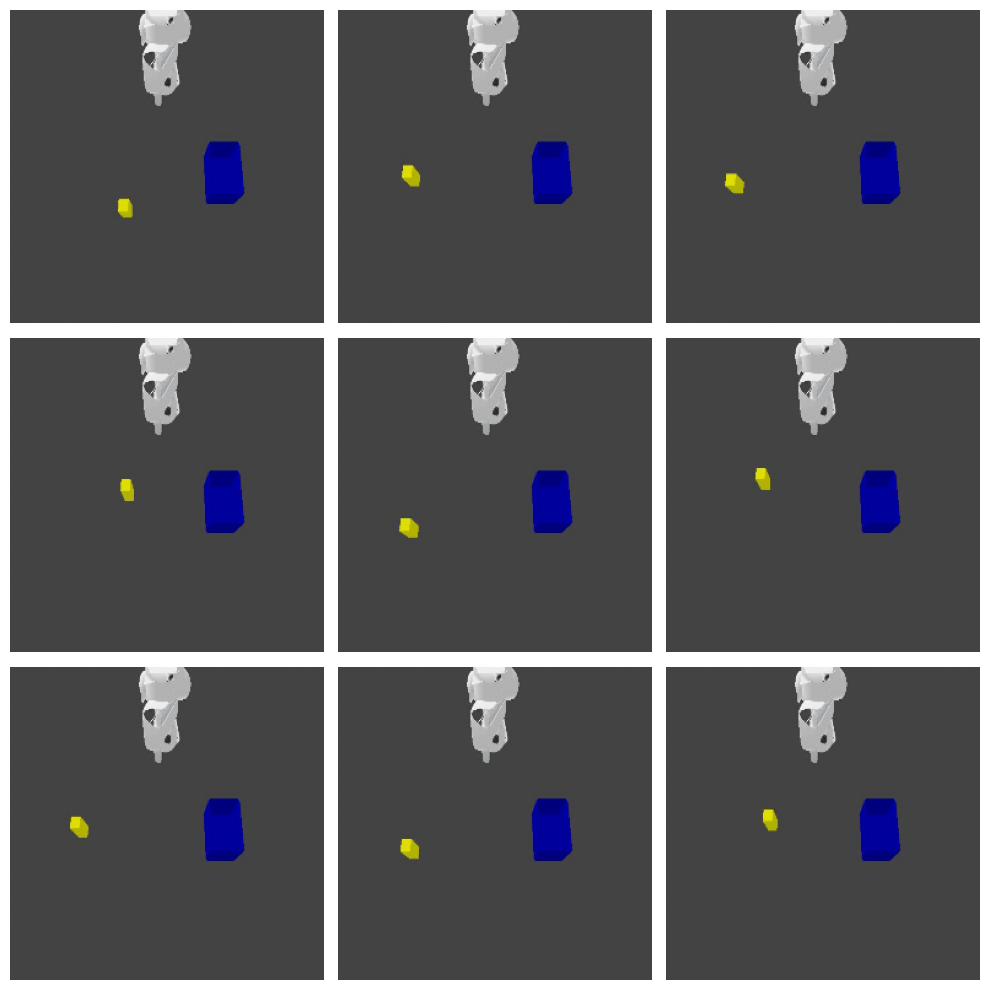

In [3]:
dirs = os.listdir(DATA_PATH)
im_paths = [f"{DATA_PATH}/{dirs[i]}/images/0000.jpg" for i in range(image_count)]
images = images_to_np_array_from_im_paths(im_paths, image_dim=256)
num_images = images.shape[0]
rand_indices = np.random.choice(num_images, size=9, replace=False)
rand_images = [np.transpose(images[i], (1, 2, 0)) for i in rand_indices]
plot_image_grid(rand_images)

In [4]:
dataset = TensorDataset(torch.Tensor(images))

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

In [5]:
model = AE(latent_dim=LATENT_DIM, input_dim=IMAGE_RESIZE).to(device)
model = train_ae(model, device, train_loader, val_loader, n_epochs=2000, lr=1e-4, checkpoint_every=500)

32768
Epoch 1,	 Train Loss: 0.119038,	 Val Loss: 0.118659
Epoch 2,	 Train Loss: 0.118874,	 Val Loss: 0.118497
Epoch 3,	 Train Loss: 0.118718,	 Val Loss: 0.118336
Epoch 4,	 Train Loss: 0.118549,	 Val Loss: 0.118175
Epoch 5,	 Train Loss: 0.118395,	 Val Loss: 0.118014
Epoch 6,	 Train Loss: 0.118233,	 Val Loss: 0.117853
Epoch 7,	 Train Loss: 0.118068,	 Val Loss: 0.117692
Epoch 8,	 Train Loss: 0.117915,	 Val Loss: 0.117532
Epoch 9,	 Train Loss: 0.117755,	 Val Loss: 0.117371
Epoch 10,	 Train Loss: 0.117593,	 Val Loss: 0.117211
Epoch 11,	 Train Loss: 0.117432,	 Val Loss: 0.117050
Epoch 12,	 Train Loss: 0.117273,	 Val Loss: 0.116889
Epoch 13,	 Train Loss: 0.117113,	 Val Loss: 0.116727
Epoch 14,	 Train Loss: 0.116956,	 Val Loss: 0.116565
Epoch 15,	 Train Loss: 0.116792,	 Val Loss: 0.116402
Epoch 16,	 Train Loss: 0.116635,	 Val Loss: 0.116239
Epoch 17,	 Train Loss: 0.116473,	 Val Loss: 0.116075
Epoch 18,	 Train Loss: 0.116311,	 Val Loss: 0.115909
Epoch 19,	 Train Loss: 0.116148,	 Val Loss: 0.115

KeyboardInterrupt: 

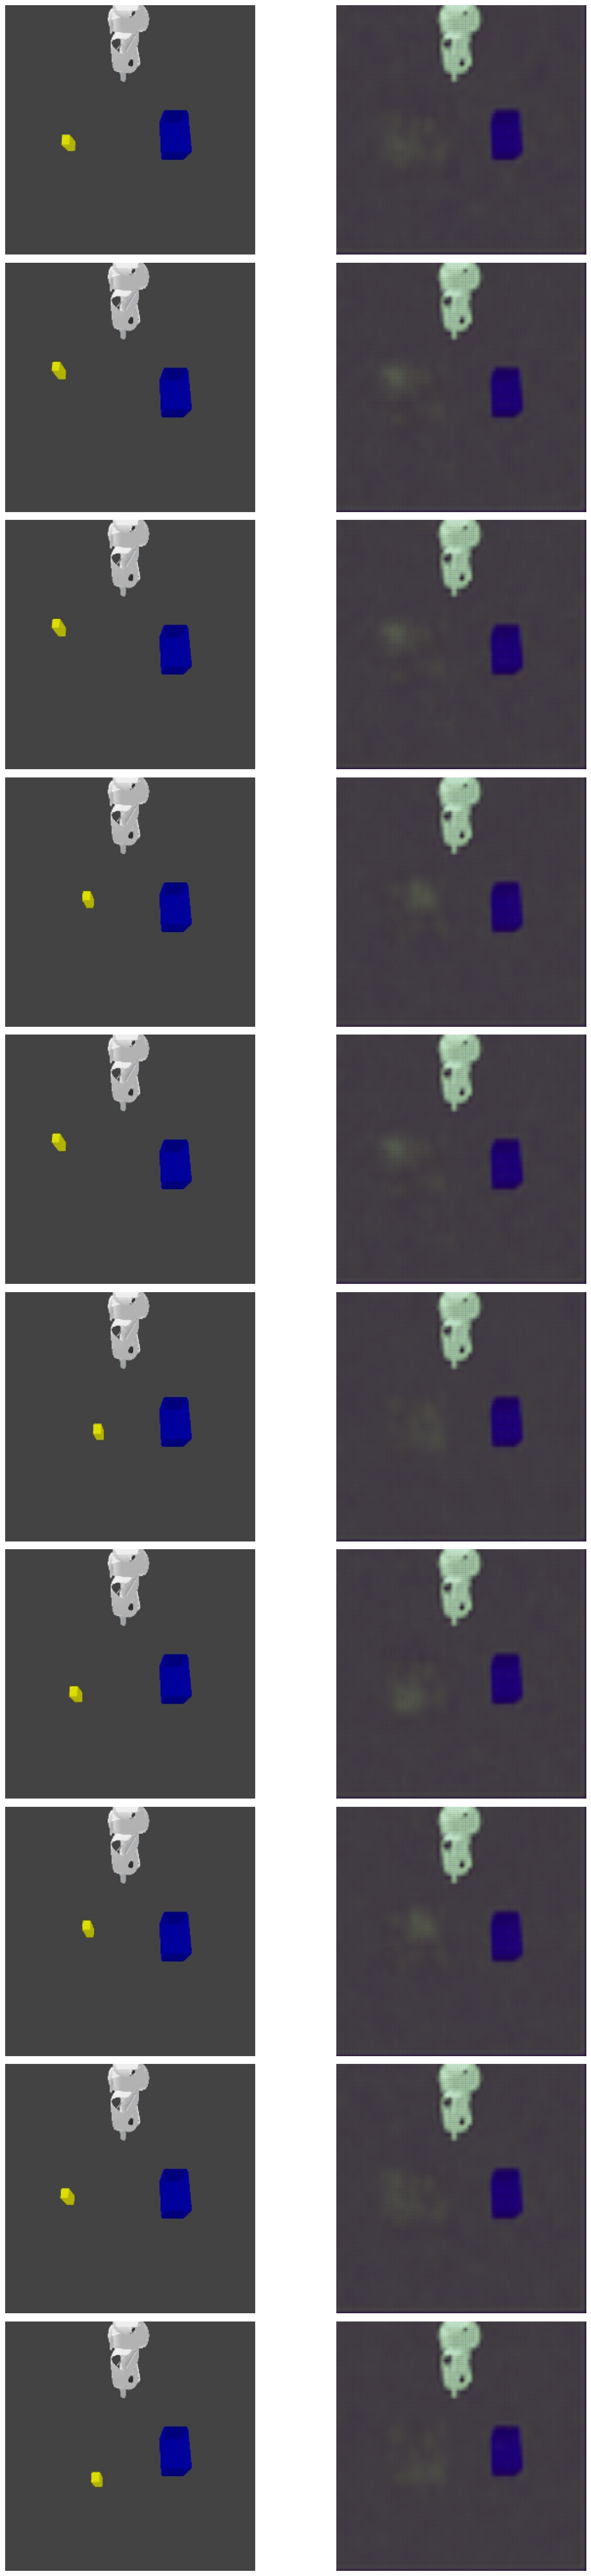

In [11]:
example_count = 10
rand_images = np.array([val_dataset[np.random.randint(0, len(val_dataset))][0] for _ in range(example_count)])
pred_images = model.forward_clean(torch.Tensor(rand_images).to(device))

fig, axes = plt.subplots(example_count, 2, figsize=(15, 50))

for i in range(example_count):
    image = np.transpose(rand_images[i], (1, 2, 0))
    axes[i, 0].imshow(image)
    axes[i, 1].imshow(pred_images[i])

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')

plt.tight_layout()
model_path = model.path
plt.savefig(f"{model_path}/results.png")
plt.show()